## **EDA의 핵심 - 데이터의 결측치와 특이값(이상치) 채크와 처리**
### 데이터 읽어서 정보 보기

In [1]:
import pandas as pd
# 파일 리드
bank_df = pd.read_csv('bank.csv')
# 선두에서 5행까지 표시
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,36,technician,single,secondary,no,265,yes,yes,NaN,5,may,348,1,-1,0,NaN,no
2,25,blue-collar,married,secondary,no,-7,yes,no,NaN,5,may,365,1,-1,0,NaN,no
3,53,technician,married,secondary,no,-3,no,no,NaN,5,may,1666,1,-1,0,NaN,no
4,24,technician,single,secondary,no,-103,yes,yes,NaN,5,may,145,1,-1,0,NaN,no


In [2]:
# 데이터의 건수, 항목수를 확인
print(bank_df.shape)

# 데이터형을 확인
print(bank_df.dtypes)

(7234, 17)
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


In [3]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7234 entries, 0 to 7233
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        7234 non-null   int64 
 1   job        7190 non-null   object
 2   marital    7234 non-null   object
 3   education  6961 non-null   object
 4   default    7234 non-null   object
 5   balance    7234 non-null   int64 
 6   housing    7234 non-null   object
 7   loan       7234 non-null   object
 8   contact    5196 non-null   object
 9   day        7234 non-null   int64 
 10  month      7234 non-null   object
 11  duration   7234 non-null   int64 
 12  campaign   7234 non-null   int64 
 13  pdays      7234 non-null   int64 
 14  previous   7234 non-null   int64 
 15  poutcome   1334 non-null   object
 16  y          7234 non-null   object
dtypes: int64(7), object(10)
memory usage: 960.9+ KB


### 결측치 확인하기

In [4]:
bank_df.isna().sum() 

age             0
job            44
marital         0
education     273
default         0
balance         0
housing         0
loan            0
contact      2038
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     5900
y               0
dtype: int64

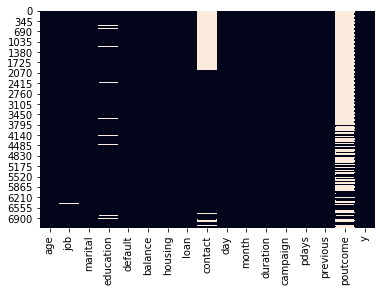

In [5]:
import seaborn as sns
sns.heatmap(bank_df.isnull(), cbar=False)

In [6]:
!pip install missingno

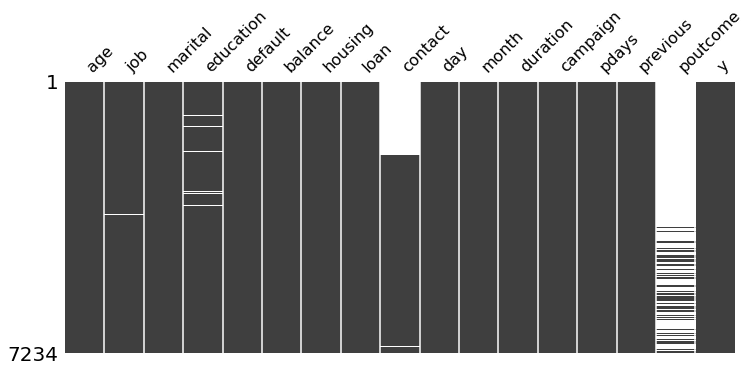

In [7]:
import missingno as msno 
msno.matrix(bank_df, figsize=(12,5), sparkline=False)

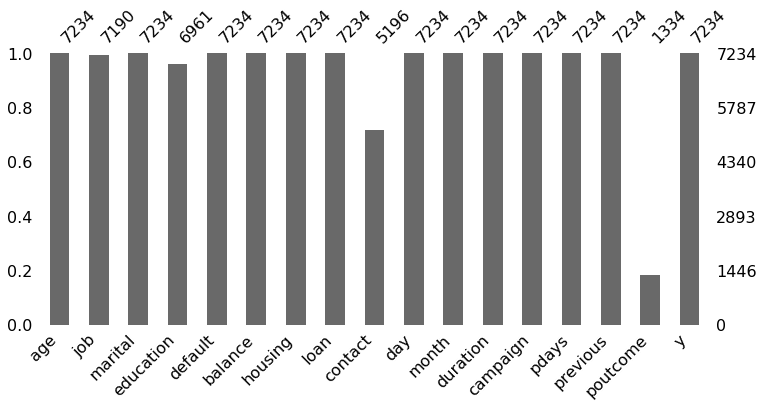

In [8]:
msno.bar(bank_df, figsize=(12,5))

### 결측치를 포함한 행 삭제

In [9]:
# job과 education 열에서 결측치가 포함된 행을 삭제
bank_df = bank_df.dropna(subset=['job', 'education'])

# 데이터의 건수, 항목수를 확인
print(bank_df.shape)

(6935, 17)


### 결측치를 2400개이상 포함한 열 삭제

In [10]:
# 결측치이 2400개 이상인 열을 제외
bank_df = bank_df.dropna(thresh=2400, axis=1) # axis 중요!!!

# 데이터의 건수, 항목수를 확인
print(bank_df.shape)
print(bank_df.info())

(6935, 16)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6935 entries, 0 to 7233
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        6935 non-null   int64 
 1   job        6935 non-null   object
 2   marital    6935 non-null   object
 3   education  6935 non-null   object
 4   default    6935 non-null   object
 5   balance    6935 non-null   int64 
 6   housing    6935 non-null   object
 7   loan       6935 non-null   object
 8   contact    5010 non-null   object
 9   day        6935 non-null   int64 
 10  month      6935 non-null   object
 11  duration   6935 non-null   int64 
 12  campaign   6935 non-null   int64 
 13  pdays      6935 non-null   int64 
 14  previous   6935 non-null   int64 
 15  y          6935 non-null   object
dtypes: int64(7), object(9)
memory usage: 921.1+ KB
None


### 결측치 채우기

In [11]:
# 결측치을 「unknown」으로 치환
bank_df = bank_df.fillna({'contact':'unknown'})

# 선두에서 5행까지 표시
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,no
1,36,technician,single,secondary,no,265,yes,yes,unknown,5,may,348,1,-1,0,no
2,25,blue-collar,married,secondary,no,-7,yes,no,unknown,5,may,365,1,-1,0,no
3,53,technician,married,secondary,no,-3,no,no,unknown,5,may,1666,1,-1,0,no
4,24,technician,single,secondary,no,-103,yes,yes,unknown,5,may,145,1,-1,0,no


In [12]:
import pandas as pd
import numpy as np

# 날짜를 만듭니다.
time_index = pd.date_range("2020/01/01", periods=5, freq="M")
print(type(time_index))

# 비어있는 데이터프레임을 만들고 인덱스를 지정합니다.
dataframe = pd.DataFrame(index=time_index)

# 누락된 값이 있는 열을 만듭니다.
dataframe["Sales"] = [1.0,2.0,np.nan,np.nan,5.0]
dataframe

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


,Sales
2020-01-31,1.0
2020-02-29,2.0
2020-03-31,NaN
2020-04-30,NaN
2020-05-31,5.0


In [13]:
time_index = pd.date_range("01-01-2020", periods=5, freq="3M")

dataframe = pd.DataFrame(index=time_index)

dataframe["Sales"] = [1.0,2.0,np.nan,np.nan,5.0]
dataframe

,Sales
2020-01-31,1.0
2020-04-30,2.0
2020-07-31,NaN
2020-10-31,NaN
2021-01-31,5.0


In [14]:
time_index = pd.date_range("2020-01-01", periods=5, freq="MS")

dataframe = pd.DataFrame(index=time_index)

dataframe["Sales"] = [1.0,2.0,np.nan,np.nan,5.0]
dataframe

,Sales
2020-01-01,1.0
2020-02-01,2.0
2020-03-01,NaN
2020-04-01,NaN
2020-05-01,5.0


In [15]:
# 누락된 값을 보간합니다.
dataframe.interpolate()

,Sales
2020-01-01,1.0
2020-02-01,2.0
2020-03-01,3.0
2020-04-01,4.0
2020-05-01,5.0


In [16]:
# 앞쪽으로 채우기(Forward-fill)
dataframe.ffill()

,Sales
2020-01-01,1.0
2020-02-01,2.0
2020-03-01,2.0
2020-04-01,2.0
2020-05-01,5.0


In [17]:
dataframe.fillna(method ='ffill') 

,Sales
2020-01-01,1.0
2020-02-01,2.0
2020-03-01,2.0
2020-04-01,2.0
2020-05-01,5.0


In [18]:
# 뒤쪽으로 채우기(Back-fill)
dataframe.bfill()

,Sales
2020-01-01,1.0
2020-02-01,2.0
2020-03-01,5.0
2020-04-01,5.0
2020-05-01,5.0


In [19]:
dataframe.fillna(method ='bfill') 

,Sales
2020-01-01,1.0
2020-02-01,2.0
2020-03-01,5.0
2020-04-01,5.0
2020-05-01,5.0


In [20]:
# 누락된 값을 보간하기
dataframe.interpolate(limit=1, limit_direction="forward")

,Sales
2020-01-01,1.0
2020-02-01,2.0
2020-03-01,3.0
2020-04-01,NaN
2020-05-01,5.0


In [21]:
# 누락된 값을 보간하기
dataframe.interpolate(limit=1, limit_direction="backward")

,Sales
2020-01-01,1.0
2020-02-01,2.0
2020-03-01,NaN
2020-04-01,4.0
2020-05-01,5.0


In [23]:
dict = {'One' :  [np.nan, np.nan, 95, 80], 
    'Two' : [np.nan, np.nan, np.nan, np.nan], 
    'Three':[52, np.nan, 80, 98], 
    'Four':[np.nan, np.nan, np.nan, 65],
    'Five':[10, None, 30, 40],
    'Six': [np.nan, np.nan, np.nan, pd.NaT],
    'Seven': [np.nan, np.nan, None, np.nan],
    'Eight': [np.nan, np.nan, None, pd.NaT]} 

df = pd.DataFrame(dict)
display(df)

,One,Two,Three,Four,Five,Six,Seven,Eight
0,NaN,NaN,52.0,NaN,10.0,NaT,NaN,NaT
1,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT
2,95.0,NaN,80.0,NaN,30.0,NaT,NaN,NaT
3,80.0,NaN,98.0,65.0,40.0,NaT,NaN,NaT


In [24]:
df.dropna(how = 'all') 

,One,Two,Three,Four,Five,Six,Seven,Eight
0,NaN,NaN,52.0,NaN,10.0,NaT,NaN,NaT
2,95.0,NaN,80.0,NaN,30.0,NaT,NaN,NaT
3,80.0,NaN,98.0,65.0,40.0,NaT,NaN,NaT


In [25]:
df.dropna(how = 'all', axis=1) 

,One,Three,Four,Five
0,NaN,52.0,NaN,10.0
1,NaN,NaN,NaN,NaN
2,95.0,80.0,NaN,30.0
3,80.0,98.0,65.0,40.0


In [26]:
df.dropna(subset=['One', 'Four'])

,One,Two,Three,Four,Five,Six,Seven,Eight
3,80.0,NaN,98.0,65.0,40.0,NaT,NaN,NaT


In [27]:
df.dropna(subset=['Eight'])

,One,Two,Three,Four,Five,Six,Seven,Eight


In [28]:
df.isna()

,One,Two,Three,Four,Five,Six,Seven,Eight
0,True,True,False,True,False,True,True,True
1,True,True,True,True,True,True,True,True
2,False,True,False,True,False,True,True,True
3,False,True,False,False,False,True,True,True


In [29]:
df.isna().sum()

One      2
Two      4
Three    1
Four     3
Five     1
Six      4
Seven    4
Eight    4
dtype: int64

In [30]:
dict = {'First Score':[100, 90, None, 95, 85], 
        'Second Score': [30, 45, None, np.nan, 60], 
        'Third Score':[np.nan, 40, np.nan, 80, None]} 
df = pd.DataFrame(dict) 
display(df)

,First Score,Second Score,Third Score
0,100.0,30.0,NaN
1,90.0,45.0,40.0
2,NaN,NaN,NaN
3,95.0,NaN,80.0
4,85.0,60.0,NaN


In [31]:
df.isna()

,First Score,Second Score,Third Score
0,False,False,True
1,False,False,False
2,True,True,True
3,False,True,False
4,False,False,True


In [32]:
df.fillna(0) 

,First Score,Second Score,Third Score
0,100.0,30.0,0.0
1,90.0,45.0,40.0
2,0.0,0.0,0.0
3,95.0,0.0,80.0
4,85.0,60.0,0.0


In [33]:
df.fillna(method ='ffill') 

,First Score,Second Score,Third Score
0,100.0,30.0,NaN
1,90.0,45.0,40.0
2,90.0,45.0,40.0
3,95.0,45.0,80.0
4,85.0,60.0,80.0


In [34]:
df.fillna(method ='bfill')  

,First Score,Second Score,Third Score
0,100.0,30.0,40.0
1,90.0,45.0,40.0
2,95.0,60.0,80.0
3,95.0,60.0,80.0
4,85.0,60.0,NaN


In [35]:
df.replace(to_replace = np.nan, value = -50)

,First Score,Second Score,Third Score
0,100.0,30.0,-50.0
1,90.0,45.0,40.0
2,-50.0,-50.0,-50.0
3,95.0,-50.0,80.0
4,85.0,60.0,-50.0


In [36]:
df.interpolate(limit_direction ='forward') 

,First Score,Second Score,Third Score
0,100.0,30.0,NaN
1,90.0,45.0,40.0
2,92.5,50.0,60.0
3,95.0,55.0,80.0
4,85.0,60.0,80.0


In [37]:
df.interpolate(limit_direction ='backward') 

,First Score,Second Score,Third Score
0,100.0,30.0,40.0
1,90.0,45.0,40.0
2,92.5,50.0,60.0
3,95.0,55.0,80.0
4,85.0,60.0,NaN


In [38]:
df.interpolate(limit_direction ='both') 

,First Score,Second Score,Third Score
0,100.0,30.0,40.0
1,90.0,45.0,40.0
2,92.5,50.0,60.0
3,95.0,55.0,80.0
4,85.0,60.0,80.0


In [39]:
# 예제 5-6
# 라이브러리 불러오기
import pandas as pd

# 중복 데이터를 갖는 데이터프레임 만들기
df = pd.DataFrame({'c1':['a', 'a', 'b', 'a', 'b'],
                  'c2':[1, 1, 1, 2, 2],
                  'c3':[1, 1, 2, 2, 2]})
print(df)
print('\n')

# 데이터프레임 전체 행 데이터 중에서 중복값 찾기
df_dup = df.duplicated()
print(df_dup)
print('\n')

# 데이터프레임의 특정 열 데이터에서 중복값 찾기
col_dup = df['c2'].duplicated()
print(col_dup)

  c1  c2  c3
0  a   1   1
1  a   1   1
2  b   1   2
3  a   2   2
4  b   2   2


0    False
1     True
2    False
3    False
4    False
dtype: bool


0    False
1     True
2     True
3    False
4     True
Name: c2, dtype: bool


In [40]:
# 예제 5-7
# 라이브러리 불러오기
import pandas as pd

# 중복 데이터를 갖는 데이터프레임 만들기
df = pd.DataFrame({'c1':['a', 'a', 'b', 'a', 'b'],
                  'c2':[1, 1, 1, 2, 2],
                  'c3':[1, 1, 2, 2, 2]})
print(df)
print('\n')

# 데이터프레임에서 중복 행을 제거
df2 = df.drop_duplicates()
print(df2)
print('\n')

# c2, c3열을 기준으로 중복 행을 제거
df3 = df.drop_duplicates(subset=['c2', 'c3'])
print(df3)


  c1  c2  c3
0  a   1   1
1  a   1   1
2  b   1   2
3  a   2   2
4  b   2   2


  c1  c2  c3
0  a   1   1
2  b   1   2
3  a   2   2
4  b   2   2


  c1  c2  c3
0  a   1   1
2  b   1   2
3  a   2   2


In [41]:
# 예제 5-19
# 라이브러리 불러오기
import pandas as pd

# read_csv() 함수로 파일 읽어와서 df로 변환
df = pd.read_csv('stock-data.csv')

# 문자열인 날짜 데이터를 판다스 Timestamp로 변환
df['new_Date'] = pd.to_datetime(df['Date'])   #df에 새로운 열로 추가
print(df.head())
print(df.info())

         Date  Close  Start   High    Low  Volume   new_Date
0  2018-07-02  10100  10850  10900  10000  137977 2018-07-02
1  2018-06-29  10700  10550  10900   9990  170253 2018-06-29
2  2018-06-28  10400  10900  10950  10150  155769 2018-06-28
3  2018-06-27  10900  10800  11050  10500  133548 2018-06-27
4  2018-06-26  10800  10900  11000  10700   63039 2018-06-26
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      20 non-null     object        
 1   Close     20 non-null     int64         
 2   Start     20 non-null     int64         
 3   High      20 non-null     int64         
 4   Low       20 non-null     int64         
 5   Volume    20 non-null     int64         
 6   new_Date  20 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 1.2+ KB
None


In [42]:
# dt 속성을 이용하여 new_Date 열의 년월일 정보를 년, 월, 일로 구분
df['Year'] = df['new_Date'].dt.year
df['Month'] = df['new_Date'].dt.month
df['Day'] = df['new_Date'].dt.day
print(df.head())
print(df.info())

         Date  Close  Start   High    Low  Volume   new_Date  Year  Month  Day
0  2018-07-02  10100  10850  10900  10000  137977 2018-07-02  2018      7    2
1  2018-06-29  10700  10550  10900   9990  170253 2018-06-29  2018      6   29
2  2018-06-28  10400  10900  10950  10150  155769 2018-06-28  2018      6   28
3  2018-06-27  10900  10800  11050  10500  133548 2018-06-27  2018      6   27
4  2018-06-26  10800  10900  11000  10700   63039 2018-06-26  2018      6   26
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      20 non-null     object        
 1   Close     20 non-null     int64         
 2   Start     20 non-null     int64         
 3   High      20 non-null     int64         
 4   Low       20 non-null     int64         
 5   Volume    20 non-null     int64         
 6   new_Date  20 non-null     datetime64[ns]
 7   Year

### 특이값(이상치)의 삭제

In [ ]:
# age가 18세이상 100세미만이 아닌행을 삭제
bank_df = bank_df[bank_df['age'] >= 18]
bank_df = bank_df[bank_df['age'] < 100]

# 데이터 건수, 항목수를 확인
print(bank_df.shape)